图像平滑处理

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from torchvision import transforms

In [3]:
filename = 'D:\code\pytorch_learn\data\mao.jpg'

在尽量保留图像原有信息的情况下，过滤掉图像内部的噪声，这一过程称为对图像的平滑处理，所得的图像称为平滑图像.

如果针对图像内的每一个像素点都进行上述平滑处理，就能够对整幅图像完成平滑处理，有效地去除图像内的噪声信息.

图像平滑处理的基本原理是，将噪声所在像素点的像素值处理为其周围临近像素点的值的近似值.

在OpenCV中，图7-12右侧的矩阵被称为卷积核.

![卷积核](https://res.weread.qq.com/wrepub/epub_26297910_202)

均值滤波是指用当前像素点周围N·N个像素值的均值来代替当前像素值.

在OpenCV中，实现均值滤波的函数是cv2.blur().

边界样式参数 borderType
![边界样式](https://res.weread.qq.com/wrepub/epub_26297910_204)

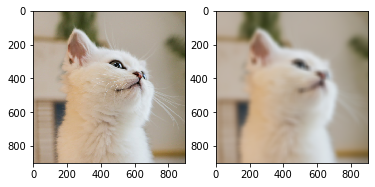

In [6]:
img = np.array(Image.open(filename))
plt.subplot(1, 2, 1); plt.imshow(img)

dst = cv2.blur(img, (30, 30))
plt.subplot(1, 2, 2); plt.imshow(dst)

plt.show()

在方框滤波中，可以自由选择是否对均值滤波的结果进行归一化，即可以自由选择滤波结果是邻域像素值之和的平均值，还是邻域像素值之和。

在OpenCV中，实现方框滤波的函数是cv2.boxFilter().

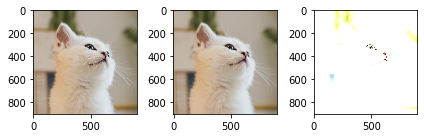

In [24]:
img = np.array(Image.open(filename))
plt.subplot(1, 3, 1); plt.imshow(img)

# normalize=1 表示进行归一化处理, 使用领域像素值之和除以面积
dst1 = cv2.boxFilter(img, -1, (5, 5), normalize=1)
plt.subplot(1, 3, 2); plt.imshow(dst1)

# normalize=0, 表示不进行归一化处理, 直接使用领域像素值之和
dst2 = cv2.boxFilter(img, -1, (2, 2), normalize=0)  # 四个像素值的和很可能大于255, 所以显示为大片的白色
plt.subplot(1, 3, 3); plt.imshow(dst2)

plt.tight_layout()  # 自动调整 padding
plt.show()

在进行均值滤波和方框滤波时，其邻域内每个像素的权重是相等的。在高斯滤波中，会将中心点的权重值加大，远离中心点的权重值减小，在此基础上计算邻域内各个像素值不同权重的和.

在OpenCV中，实现高斯滤波的函数是cv2.GaussianBlur().

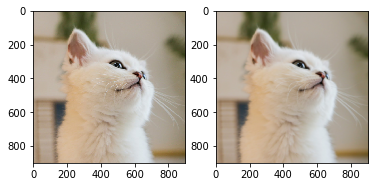

In [27]:
img = np.array(Image.open(filename))
plt.subplot(1, 2, 1); plt.imshow(img)

#  sigmaX是卷积核在水平方向上（X轴方向）的标准差，其控制的是权重比例
dst = cv2.GaussianBlur(img, (11, 11), sigmaX=0, sigmaY=0)
plt.subplot(1, 2, 2); plt.imshow(dst)

plt.show()

中值滤波与前面介绍的滤波方式不同，不再采用加权求均值的方式计算滤波结果。它用邻域内所有像素值的中间值来替代当前像素点的像素值。

中值滤波会取当前像素点及其周围临近像素点（一共有奇数个像素点）的像素值，将这些像素值排序，然后将位于中间位置的像素值作为当前像素点的像素值。

在OpenCV中，实现中值滤波的函数是cv2.medianBlur().

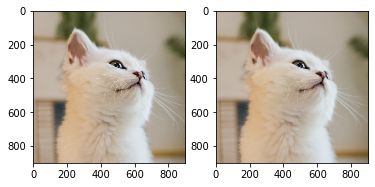

In [30]:
img = np.array(Image.open(filename))
plt.subplot(1, 2, 1); plt.imshow(img)

dst = cv2.medianBlur(img, 5)
plt.subplot(1, 2, 2); plt.imshow(dst)

plt.show()

双边滤波是综合考虑空间信息和色彩信息的滤波方式，在滤波过程中能够有效地保护图像内的边缘信息。

双边滤波在计算某一个像素点的新值时，不仅考虑距离信息（距离越远，权重越小），还考虑色彩信息（色彩差别越大，权重越小）。双边滤波综合考虑距离和色彩的权重结果，既能够有效地去除噪声，又能够较好地保护边缘信息。

在OpenCV中，实现双边滤波的函数是cv2.bilateralFilter().

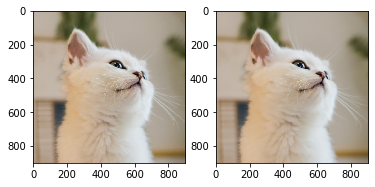

In [43]:
img = np.array(Image.open(filename))
plt.subplot(1, 2, 1); plt.imshow(img)

dst = cv2.bilateralFilter(img, 10, sigmaColor=20, sigmaSpace=20)
plt.subplot(1, 2, 2); plt.imshow(dst)

plt.show()

在OpenCV中，允许用户自定义卷积核实现卷积操作，使用自定义卷积核实现卷积操作的函数是cv2.filter2D().

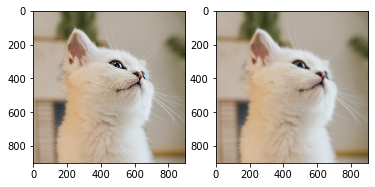

In [44]:
img = np.array(Image.open(filename))
plt.subplot(1, 2, 1); plt.imshow(img)

kernel = np.full((9, 9), 1/81, dtype=np.float32)
dst = cv2.filter2D(img, -1, kernel)
plt.subplot(1, 2, 2); plt.imshow(dst)

plt.show()